# Exploratory Data Analysis (EDA)

# Task 5

##  Exploratory Data Analysis (EDA) - Sports (Indian Premier League- IPL)

#### Import the libraries we need.

In [128]:
# Pandas for Data Manipulation
import pandas as pd

import numpy as np

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Importing and Reading the datasets

In [214]:
# Load 'real_estate.csv' in a pandas dataframe 'df'
match = pd.read_csv(r"C:\GG\Internships\The Sparks Foundation (TSF)\matches.csv")
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [215]:
delivery = pd.read_csv("C:\GG\Internships\The Sparks Foundation (TSF)\deliveries.csv")
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


### Data Understanding

In [131]:
match.shape

(1095, 20)

In [132]:
delivery.shape

(260920, 17)

In [133]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [134]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [135]:
match.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [136]:
delivery.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


### Merging the Data and Preparation

In [163]:
# Merge the DataFrames on the 'id' column
merged_df = pd.merge(delivery, match, left_on='match_id',right_on='id')

# Display the merged DataFrame
merged_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [138]:
merged_df.columns.values

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs',
       'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder', 'id', 'season',
       'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'], dtype=object)

In [139]:
merged_df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,id,result_margin,target_runs,target_overs
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,2.609200e+05,256796.000000,260611.000000,260611.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632,9.070665e+05,17.279451,167.290406,19.846742
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184,3.679913e+05,21.600307,32.165944,1.224266
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.483340e+05,6.000000,148.000000,20.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,9.809670e+05,8.000000,167.000000,20.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.254066e+06,20.000000,188.000000,20.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000,1.426312e+06,146.000000,288.000000,20.000000


In [140]:
merged_df.shape

(260920, 37)

### Understanding of data types of the features.

In [141]:
# Print column datatypes using .dtypes
merged_df.dtypes

match_id              int64
inning                int64
batting_team         object
bowling_team         object
over                  int64
ball                  int64
batter               object
bowler               object
non_striker          object
batsman_runs          int64
extra_runs            int64
total_runs            int64
extras_type          object
is_wicket             int64
player_dismissed     object
dismissal_kind       object
fielder              object
id                    int64
season               object
city                 object
date                 object
match_type           object
player_of_match      object
venue                object
team1                object
team2                object
toss_winner          object
toss_decision        object
winner               object
result               object
result_margin       float64
target_runs         float64
target_overs        float64
super_over           object
method               object
umpire1             

In [159]:
# Calculate the total number of matches
total_matches = len(match)
print(f"Total matches: {total_matches}")

Total matches: 1095


In [161]:
 # Calculate the number of matches per season
matches_per_season = match['season'].value_counts()
print(matches_per_season)

2013       76
2023       74
2012       74
2022       74
2011       73
2024       71
2018       60
2021       60
2020/21    60
2019       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: season, dtype: int64


In [162]:
# Calculate the number of matches per team
matches_per_team = match['team1'].value_counts()
print(matches_per_team)

Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Lucknow Super Giants            23
Pune Warriors                   23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: team1, dtype: int64


In [208]:
# Calculate the number of wins per team
wins_per_team = match.groupby('team1')['result'].value_counts()
print(wins_per_team)

team1                        result   
Chennai Super Kings          runs         69
                             wickets      58
                             tie           1
Deccan Chargers              runs         20
                             wickets      19
Delhi Capitals               runs         21
                             wickets      18
                             tie           2
Delhi Daredevils             wickets      48
                             runs         36
                             no result     1
Gujarat Lions                wickets      12
                             runs          3
                             tie           1
Gujarat Titans               runs         11
                             wickets      10
Kings XI Punjab              wickets      51
                             runs         41
Kochi Tuskers Kerala         wickets       4
                             runs          3
Kolkata Knight Riders        wickets      68
                

### Feature Relationships

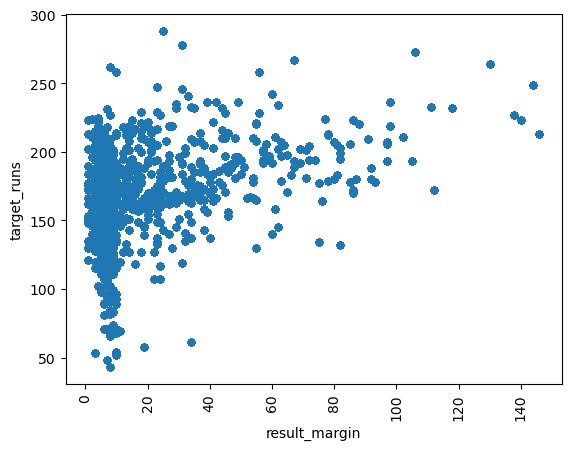

In [233]:
merged_df.plot(kind='scatter', x='result_margin', y='target_runs')

# sns.scatterplot(x='season', y='result_margin', data=match)
plt.xticks(rotation=90, fontsize=10)
plt.show()


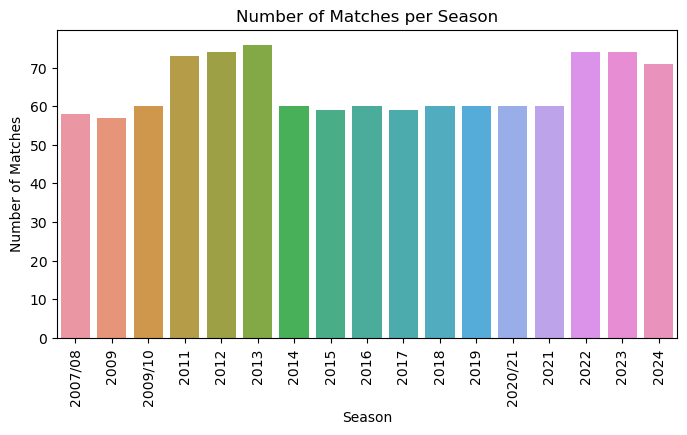

In [211]:
# Plot the number of matches per season
plt.figure(figsize=(8, 4))
sns.countplot(x='season', data=match)
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Matches')
plt.show()

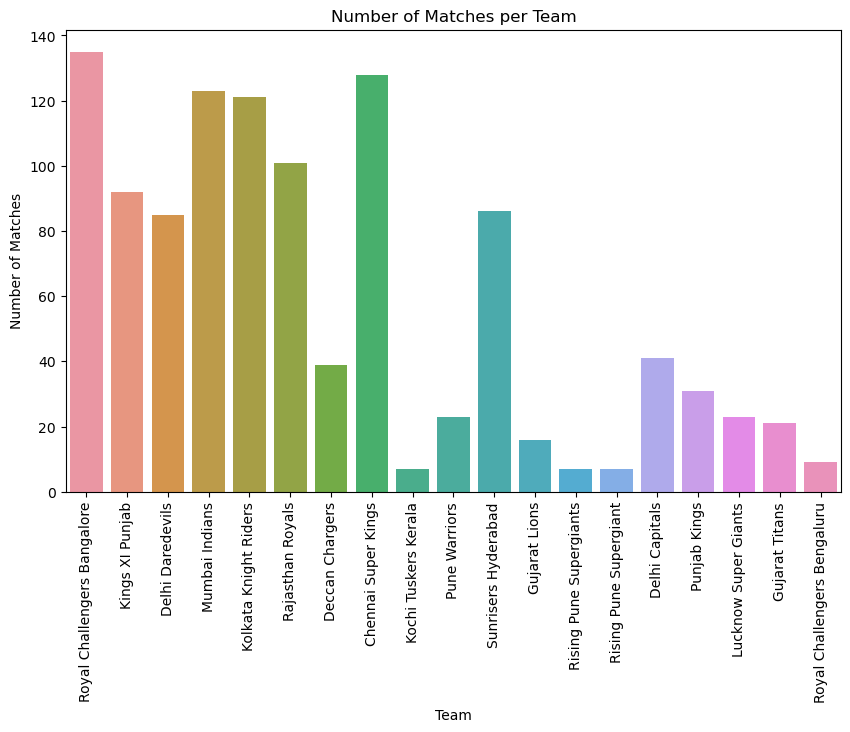

In [172]:
# Plot the number of matches per team
plt.figure(figsize=(10, 8))
sns.countplot(x='team1', data=match)
plt.title('Number of Matches per Team')
plt.xlabel('Team')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Matches')
plt.show()

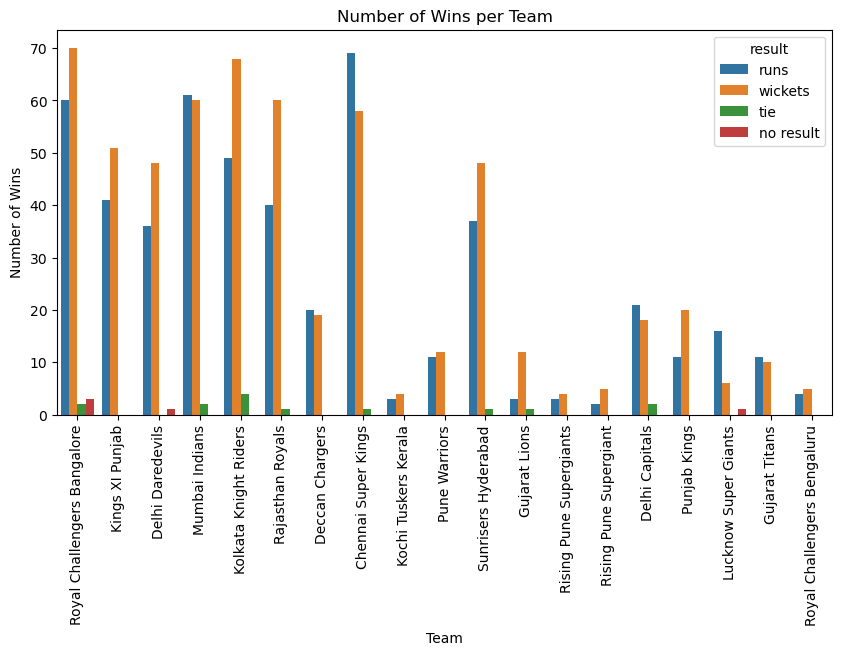

In [213]:
# Plot the number of wins per team
plt.figure(figsize=(10, 5))
sns.countplot(x='team1', hue='result', data=match)
plt.title('Number of Wins per Team')
plt.xlabel('Team')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Wins')
plt.show()

Text(0, 0.5, 'No. of matches')

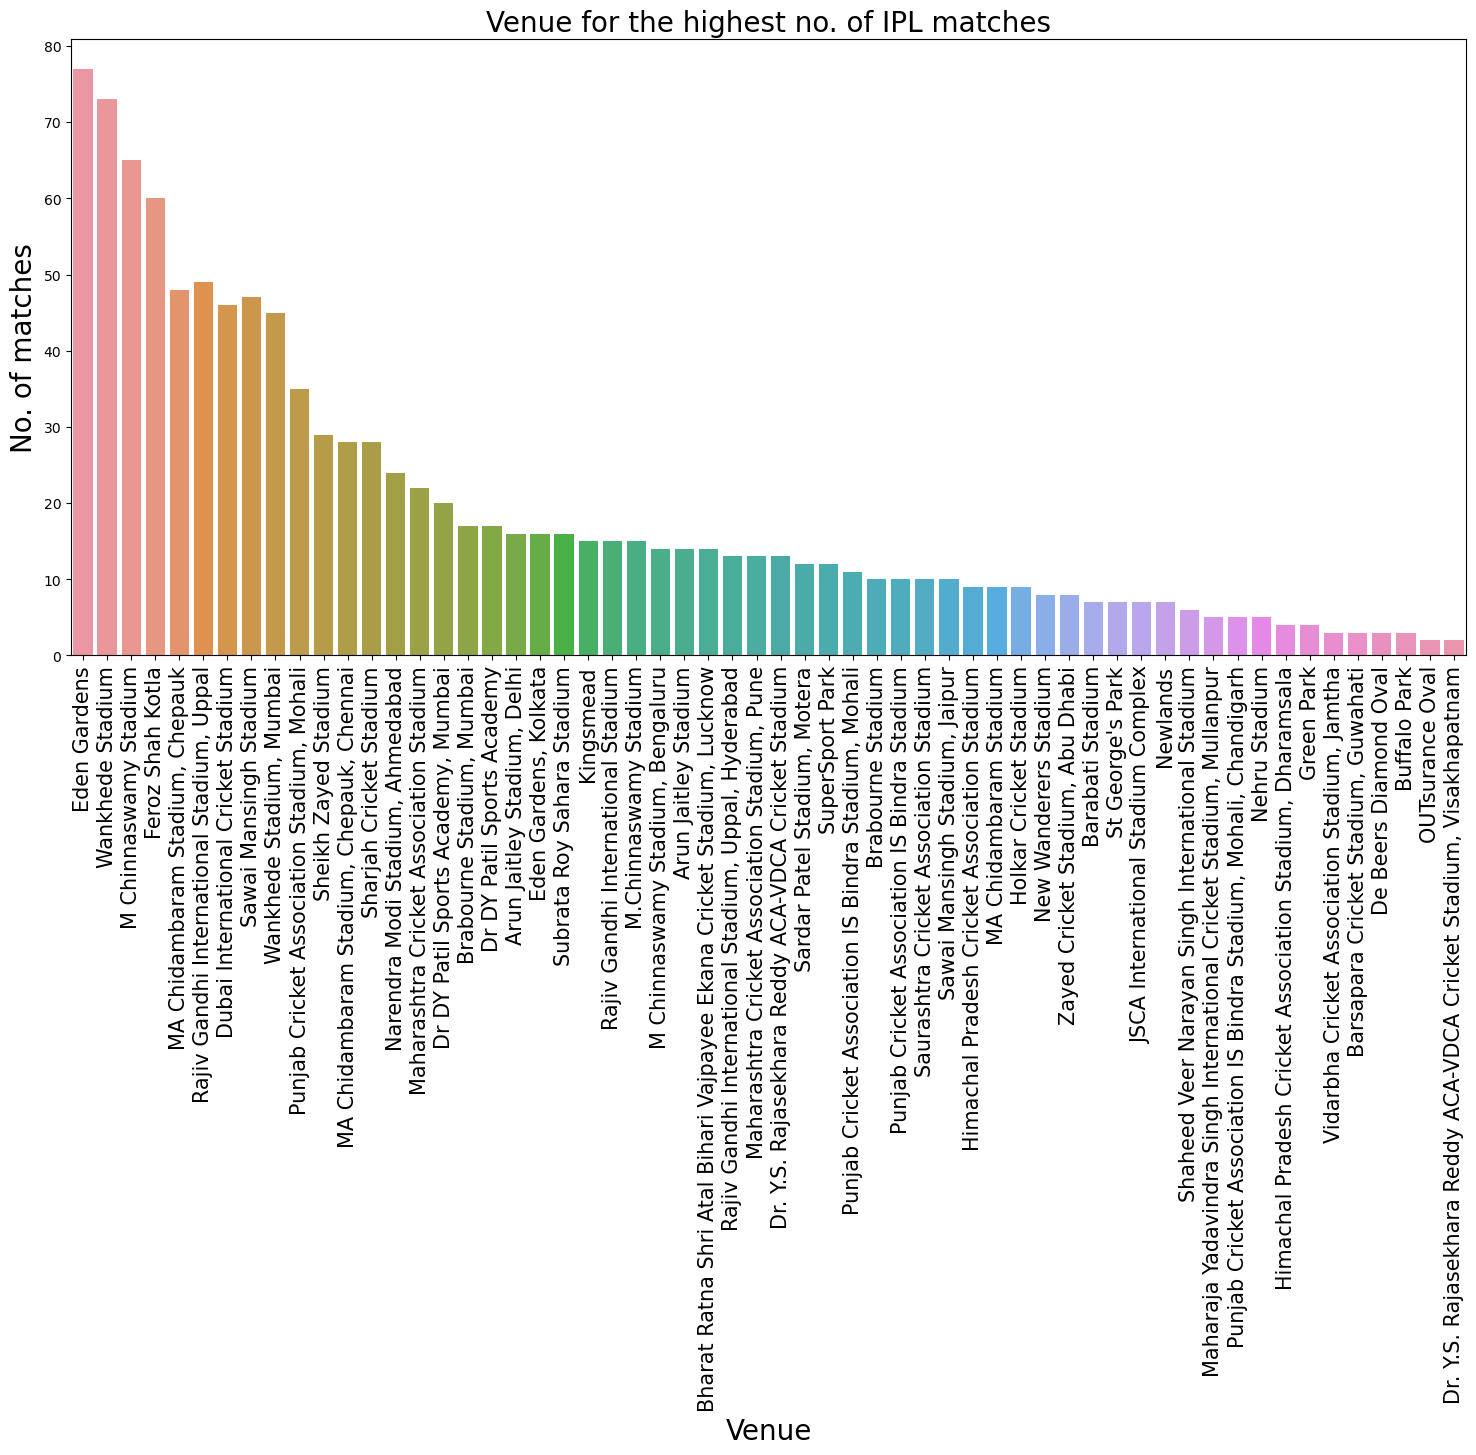

In [157]:
# Plot the Venue for the highest number of IPL matches
plt.figure(figsize=(18,8))
sns.countplot(x='venue', data=match, order=df['venue'].value_counts().index)
plt.title('Venue for the highest no. of IPL matches', fontsize=20)
plt.xlabel('Venue', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('No. of matches', fontsize=20)

### Venue that has hosted the highest number of IPL matches is the "Eden Gardens" in Kolkata.

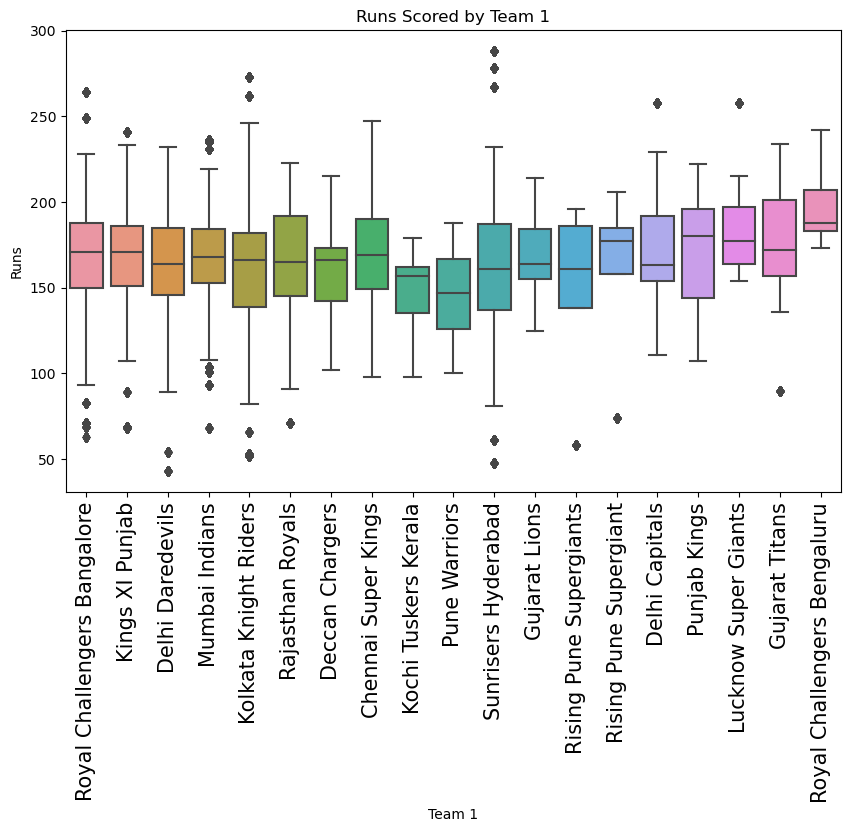

In [236]:
# Create a box plot for the runs scored by team1
plt.figure(figsize=(10, 6))
sns.boxplot(x='team1', y='target_runs', data=df)
plt.title('Runs Scored by Team 1')
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('Team 1')
plt.ylabel('Runs')
plt.show()

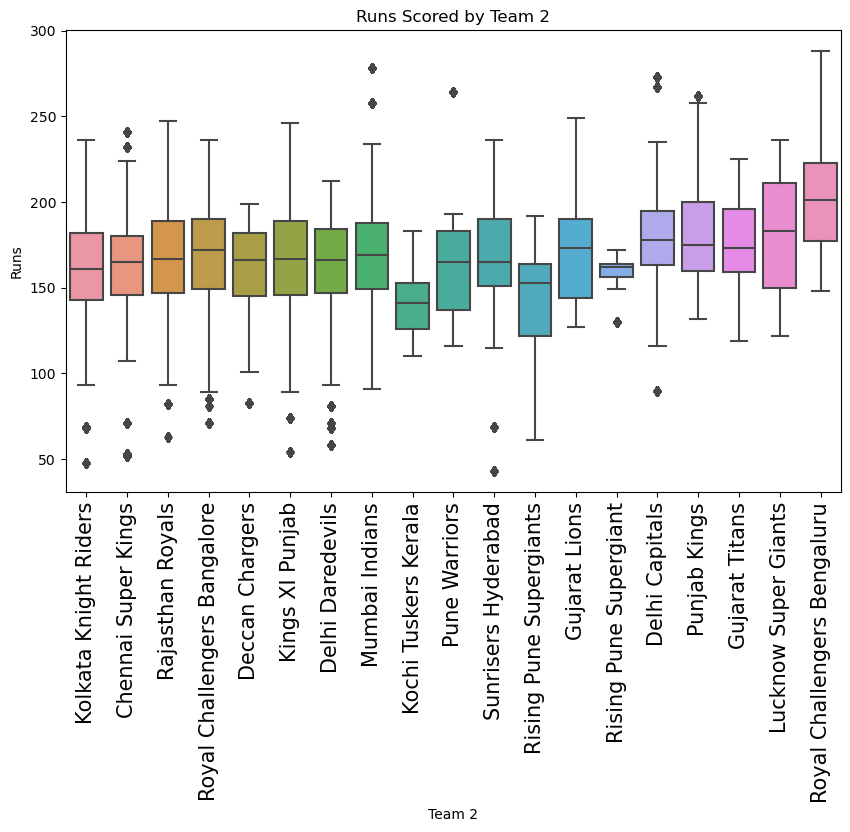

In [237]:
# Create a box plot for the runs scored by team2
plt.figure(figsize=(10, 6))
sns.boxplot(x='team2', y='target_runs', data=df)
plt.title('Runs Scored by Team 2')
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('Team 2')
plt.ylabel('Runs')
plt.show()

In [195]:
# Calculate correlations between numeric features

df.corr()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,id,result_margin,target_runs,target_overs
match_id,1.000000,0.000703,0.010064,0.004316,0.036742,-0.006003,0.035766,0.001031,1.000000,-0.007934,0.246316,0.037836
inning,0.000703,1.000000,-0.049785,-0.004786,-0.005690,0.000674,-0.005593,0.001028,0.000703,-0.003353,0.027001,0.028859
over,0.010064,-0.049785,1.000000,-0.001241,0.080040,0.004437,0.081610,0.072963,0.010064,-0.000678,0.050702,0.053749
ball,0.004316,-0.004786,-0.001241,1.000000,0.004391,0.000176,0.004463,0.004258,0.004316,0.002447,0.009974,-0.000910
batsman_runs,0.036742,-0.005690,0.080040,0.004391,1.000000,-0.142079,0.977934,-0.171751,0.036742,0.003856,0.099032,-0.005977
extra_runs,-0.006003,0.000674,0.004437,0.000176,-0.142079,1.000000,0.067852,-0.041903,-0.006003,0.004055,0.009786,-0.003357
total_runs,0.035766,-0.005593,0.081610,0.004463,0.977934,0.067852,1.000000,-0.181955,0.035766,0.004743,0.101881,-0.006732
is_wicket,0.001031,0.001028,0.072963,0.004258,-0.171751,-0.041903,-0.181955,1.000000,0.001031,0.019698,-0.010204,-0.003962
id,1.000000,0.000703,0.010064,0.004316,0.036742,-0.006003,0.035766,0.001031,1.000000,-0.007934,0.246316,0.037836
result_margin,-0.007934,-0.003353,-0.000678,0.002447,0.003856,0.004055,0.004743,0.019698,-0.007934,1.000000,0.400676,0.023635


In [196]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
id                       0
season                   0
city                 12397
date                     0
match_type               0
player_of_match        490
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 490
result                   0
result_margin         4124
target_runs            309
target_overs           309
super_over               0
method              257274
umpire1                  0
umpire2                  0
d

The variable now has a big dataframe that contains all of the correlations between numeric features.

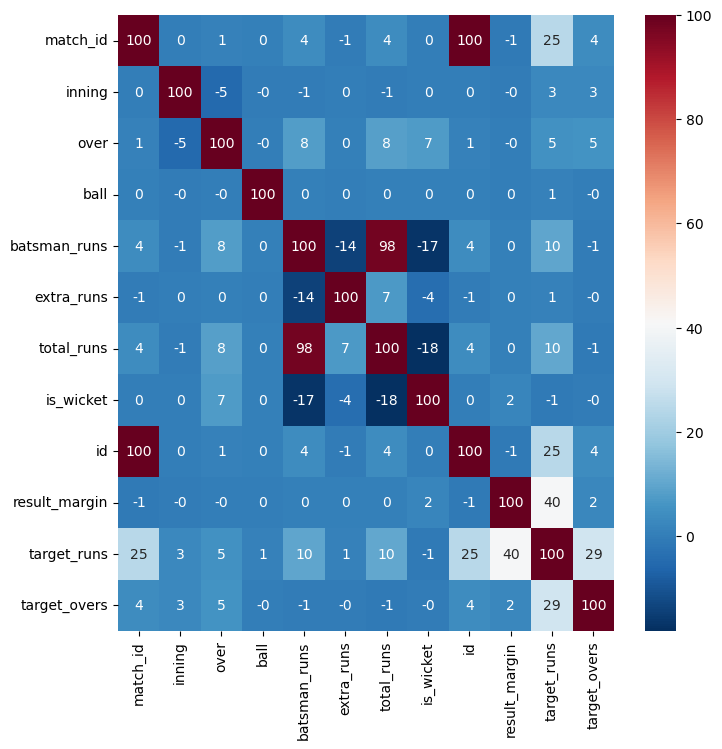

In [207]:
# Calculate correlations between numeric features
# Plot heatmap of correlations
plt.figure(figsize=(8,8))
#sns.heatmap(df.corr(),annot=False, cmap= 'RdBu_r')
sns.heatmap(df.corr()*100,annot=True,fmt='.0f', cmap='RdBu_r')
plt.show()

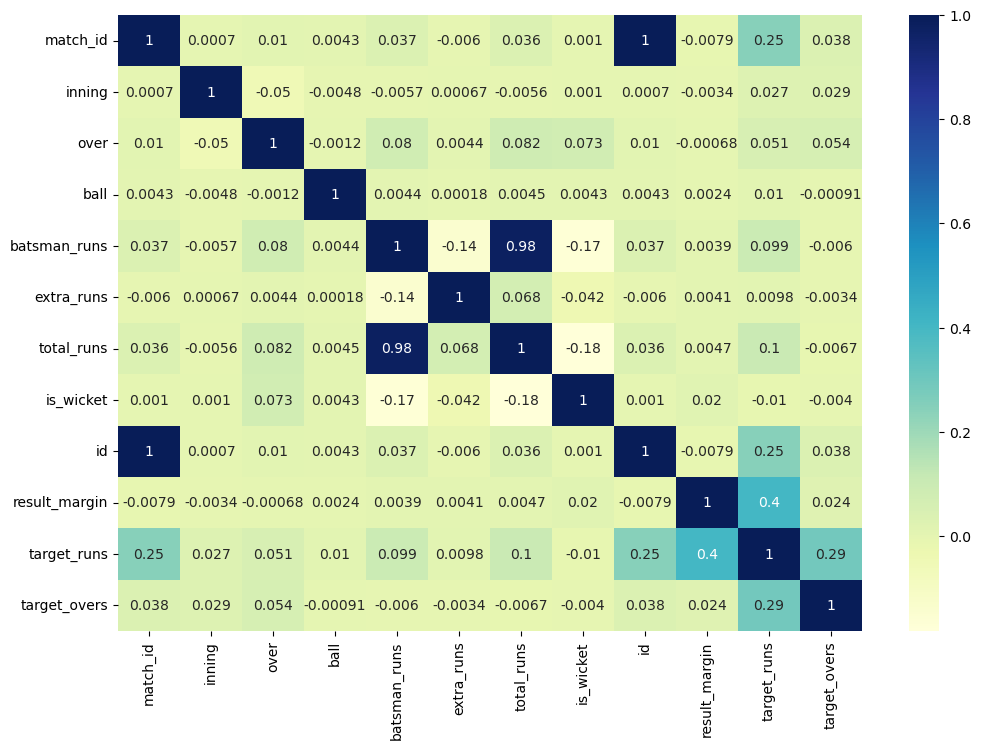

In [204]:
plt.figure(figsize=(12,8))
df.describe()
# Plot heatmap of annotated correlations
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu')
            
# display the plot
plt.show()